# Recursive Feature Elimination (RFE)
ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 0.24.2
numpy   version: 1.16.3
seaborn version: 0.9.0


## data dictionary
source: https://www.kaggle.com/uciml/pima-indians-diabetes-database  
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv'
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## sklearn: Classifier

In [5]:
import sklearn
from sklearn.model_selection import train_test_split

# these classifiers contain either coef_ or feature_importances_ attribute.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# KNeighborsClassifier has neither coef_ nor feature_importances_ attribute.
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.feature_selection import RFE # recursive feature elimination

In [6]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.20.3


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X=df[cols]
y=df['Outcome']
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)
# estimator = KNeighborsClassifier(n_neighbors=10) # error -> The classifier does not expose "coef_" or "feature_importances_" attributes
# estimator = RandomForestClassifier(n_estimators=100)
estimator = GradientBoostingClassifier(n_estimators=100)

selector = RFE(estimator, 4, step=1) # select 4 features
selector = selector.fit(X_train, y_train)

In [9]:
selector.support_ 

array([False,  True, False, False, False,  True,  True,  True])

In [10]:
selector.ranking_

array([2, 1, 3, 5, 4, 1, 1, 1])

In [11]:
selector.n_features_

4

In [12]:
np.array(cols)[selector.support_] # convert list to numpy array and use boolean array to filter data 

array(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='<U24')

In [13]:
sel_cols=np.array(cols)[selector.support_]
sel_cols

array(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='<U24')

In [14]:
selector.transform(X_test)[:5] # return only selected features

array([[1.13e+02, 2.24e+01, 1.40e-01, 2.20e+01],
       [1.22e+02, 4.97e+01, 3.25e-01, 3.10e+01],
       [1.06e+02, 2.36e+01, 1.37e-01, 4.40e+01],
       [1.54e+02, 3.24e+01, 4.43e-01, 4.50e+01],
       [1.33e+02, 4.02e+01, 6.96e-01, 3.70e+01]])

In [15]:
X_train_sel=pd.DataFrame(selector.transform(X_train), columns=np.array(cols)[selector.support_])
X_test_sel=pd.DataFrame(selector.transform(X_test), columns=np.array(cols)[selector.support_])

In [16]:
X_train_sel.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,151.0,42.9,0.516,36.0
1,133.0,32.4,0.262,37.0
2,81.0,46.3,1.096,32.0
3,97.0,40.9,0.871,32.0
4,92.0,24.2,1.698,28.0


In [17]:
X_test_sel.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,113.0,22.4,0.140,22.0
1,122.0,49.7,0.325,31.0
2,106.0,23.6,0.137,44.0
3,154.0,32.4,0.443,45.0
4,133.0,40.2,0.696,37.0


## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

### run model with selected features

In [18]:
# model= GradientBoostingClassifier(n_estimators=100, random_state=777)
model= RandomForestClassifier(n_estimators=100, random_state=777)

model.fit(X_train_sel, y_train)
score=model.score(X_test_sel, y_test)
# model_scores.append([score, a[1]])
y_pred=model.predict(X_test_sel)
print(f'feature importances', model.feature_importances_)
print(f'X[selected features] score: {score:.04f}')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

feature importances [0.3578954  0.22955244 0.22006579 0.19248638]
X[selected features] score: 0.7446
[[129  21]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



In [19]:
fs=pd.Series(model.feature_importances_, index=X_train_sel.columns).sort_values(ascending=True)
fs

Age                         0.192486
DiabetesPedigreeFunction    0.220066
BMI                         0.229552
Glucose                     0.357895
dtype: float64

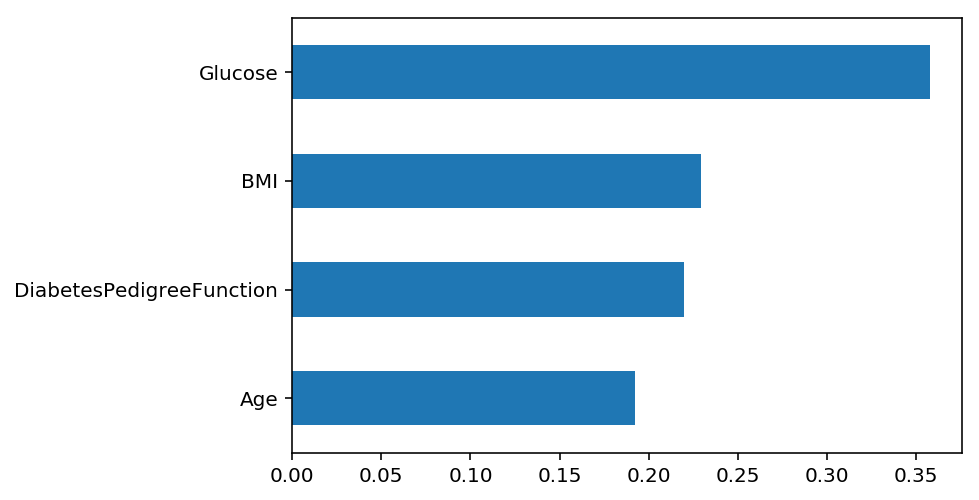

In [20]:
fs.plot(kind='barh');

### run model with all features

In [21]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
424,8,151,78,32,210,42.9,0.516,36
282,7,133,88,15,155,32.4,0.262,37
747,1,81,74,41,57,46.3,1.096,32
638,7,97,76,32,91,40.9,0.871,32
621,2,92,76,20,0,24.2,1.698,28


In [22]:
# model= GradientBoostingClassifier(n_estimators=100, random_state=777)
model= RandomForestClassifier(n_estimators=100, random_state=777)
model.fit(X_train, y_train)
score=model.score(X_test, y_test)
# model_scores.append([score, a[1]])
y_pred=model.predict(X_test)
print(f'feature importances', model.feature_importances_)
print(f'X[all features] score: {score:.04f}')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

feature importances [0.09320035 0.2471403  0.08177666 0.06958293 0.08954677 0.14764696
 0.13677649 0.13432955]
X[all features] score: 0.7532
[[131  19]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.53      0.60        81

   micro avg       0.75      0.75      0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [23]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

SkinThickness               0.069583
BloodPressure               0.081777
Insulin                     0.089547
Pregnancies                 0.093200
Age                         0.134330
DiabetesPedigreeFunction    0.136776
BMI                         0.147647
Glucose                     0.247140
dtype: float64

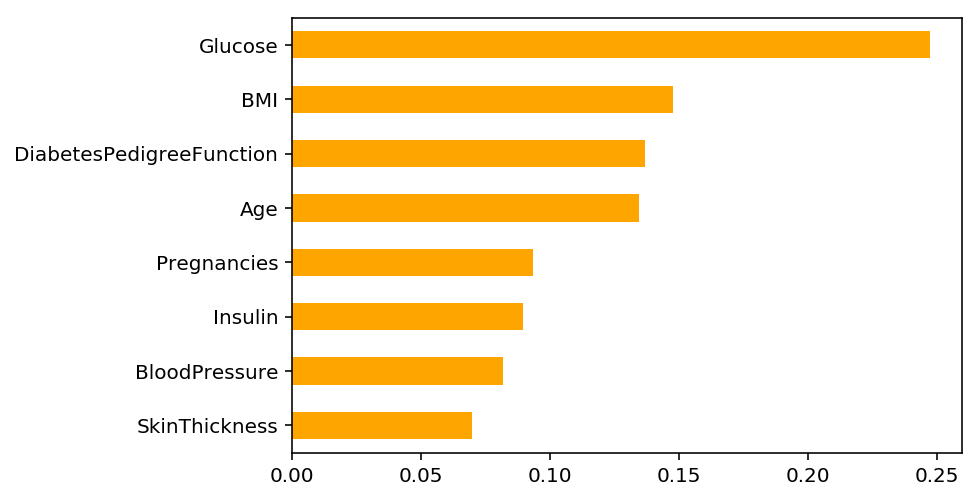

In [24]:
fs.plot(kind='barh', color='orange');

---